<a href="https://colab.research.google.com/github/jpantojaj/Backtesting_Stresstesting/blob/main/Sesi%C3%B3n_6_4_StressTesting_Modelos_RC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Basado en un script en el Github de Khalil Belghouat: https://github.com/KhalilBelghouat/StressTestingLoanPortfolio

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [3]:
Portfolio = pd.read_excel("OutstandingLoans.xlsx")

In [6]:
Portfolio

,RiskLevel,YOB,LGD,EAD
0,1,1,0.25,21.627095
1,1,2,0.25,3.259451
2,1,3,0.25,20.390560
3,1,4,0.25,3.753431
4,1,5,0.25,5.719347
...,...,...,...,...
95,2,1,0.35,89.606570
96,2,2,0.35,7.515719
97,2,3,0.35,35.214424
98,2,4,0.35,6.476053


In [4]:
LoanHistory = pd.read_excel("OldLoans.xlsx")

In [7]:
LoanHistory

,ID,RiskLevel,YOB,Year,Default
0,1,3,1,2006,0
1,1,3,2,2007,0
2,1,3,3,2008,0
3,1,3,4,2009,0
4,1,3,5,2010,0
...,...,...,...,...,...
673926,59999,2,10,2015,0
673927,59999,2,11,2016,0
673928,59999,2,12,2017,0
673929,60000,1,1,2006,0


In [41]:
LoanHistory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673931 entries, 0 to 673930
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   ID         673931 non-null  int64
 1   RiskLevel  673931 non-null  int64
 2   YOB        673931 non-null  int64
 3   Year       673931 non-null  int64
 4   Default    673931 non-null  int64
dtypes: int64(5)
memory usage: 25.7 MB


In [43]:
LoanHistory.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,673931.0,29998.143362,17313.292593,1.0,15007.0,29997.0,44964.0,60000.0
RiskLevel,673931.0,1.972460,0.813784,1.0,1.0,2.0,3.0,3.0
YOB,673931.0,6.406878,3.471281,1.0,3.0,6.0,9.0,12.0
Year,673931.0,2011.406878,3.471281,2006.0,2008.0,2011.0,2014.0,2017.0
Default,673931.0,0.007854,0.088274,0.0,0.0,0.0,0.0,1.0


In [5]:
FedHistory = pd.read_csv("Simplified_FedHistory.csv")

In [8]:
FedHistory

,Year,DJX_Return,GDP
0,2000,5.904783,2.910631
1,2001,-12.056505,0.189587
2,2002,-22.086291,2.042876
3,2003,29.449838,4.385583
4,2004,10.657407,3.123582
5,2005,4.568655,3.021188
6,2006,13.755301,2.409997
7,2007,3.784468,1.843589
8,2008,-38.613257,-2.768681
9,2009,25.703875,-0.233485


In [9]:
combinedHistory = pd.merge(LoanHistory, FedHistory, on = "Year")

In [10]:
model = smf.glm(formula = "Default ~ RiskLevel + YOB + DJX_Return + GDP",
                data = combinedHistory,
                family = sm.families.Binomial())
result = model.fit()

In [11]:
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                Default   No. Observations:               673931
Model:                            GLM   Df Residuals:                   673926
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -27334.
Date:                Sat, 02 Aug 2025   Deviance:                       54668.
Time:                        13:47:43   Pearson chi2:                 6.88e+05
No. Iterations:                    10   Pseudo R-squ. (CS):            0.01060
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.7059      0.053    -89.531      0.0

In [12]:
predictions = result.predict()

In [13]:
Default = []
for i in range(np.shape(combinedHistory["YOB"].unique())[0]):
  YOB = combinedHistory.loc[combinedHistory["YOB"] == i + 1]
  DefaultFreq = YOB["Default"].value_counts()
  DefaultRate = (DefaultFreq.values[1]/(DefaultFreq.values[0] + DefaultFreq.values[1]))*100
  Default.append(DefaultRate)

In [14]:
Model = pd.DataFrame({"YOB": np.array(combinedHistory["YOB"]), "estDefault": predictions})

In [15]:
Model

,YOB,estDefault
0,1,0.031334
1,2,0.026632
2,3,0.048399
3,4,0.016492
4,5,0.008650
...,...,...
673926,10,0.001140
673927,11,0.000784
673928,12,0.000489
673929,1,0.008341


In [16]:
estDefault = []
for i in range(np.shape(Model["YOB"].unique())[0]):
  YOB = Model.loc[Model["YOB"] == i + 1]
  estDefaultFreq = YOB["estDefault"].mean()*100
  estDefault.append(estDefaultFreq)

In [31]:
#pd.DataFrame(estDefault).hist()

In [17]:
AdverseScenario = pd.read_csv("Simplified_Adverse.csv")

In [32]:
AdverseScenario

,Year,DJX_Return,GDP
0,2018,-24.626893,-2.129263
1,2019,2.358807,0.793390
2,2020,18.992974,3.074821


In [18]:
AdversePortfolio = Portfolio.assign(Year = AdverseScenario.iloc[0, 0],
                                    DJX_Return = AdverseScenario.iloc[0, 1],
                                    GDP = AdverseScenario.iloc[0, 2])

In [33]:
AdversePortfolio

,RiskLevel,YOB,LGD,EAD,Year,DJX_Return,GDP
0,1,1,0.25,21.627095,2018,-24.626893,-2.129263
1,1,2,0.25,3.259451,2018,-24.626893,-2.129263
2,1,3,0.25,20.390560,2018,-24.626893,-2.129263
3,1,4,0.25,3.753431,2018,-24.626893,-2.129263
4,1,5,0.25,5.719347,2018,-24.626893,-2.129263
...,...,...,...,...,...,...,...
95,2,1,0.35,89.606570,2018,-24.626893,-2.129263
96,2,2,0.35,7.515719,2018,-24.626893,-2.129263
97,2,3,0.35,35.214424,2018,-24.626893,-2.129263
98,2,4,0.35,6.476053,2018,-24.626893,-2.129263


In [19]:
PD = result.predict(AdversePortfolio)

In [20]:
predPD = pd.DataFrame({"YOB": np.array(Portfolio["YOB"]), "PD": PD})

In [21]:
predDefault = []
for i in range(np.shape(predPD["YOB"].unique())[0]):
  YOB = predPD.loc[predPD["YOB"] == i + 1]
  predDefaultFreq = YOB["PD"].mean()*100
  predDefault.append(predDefaultFreq)

array([[<Axes: title={'center': '0'}>]], dtype=object)

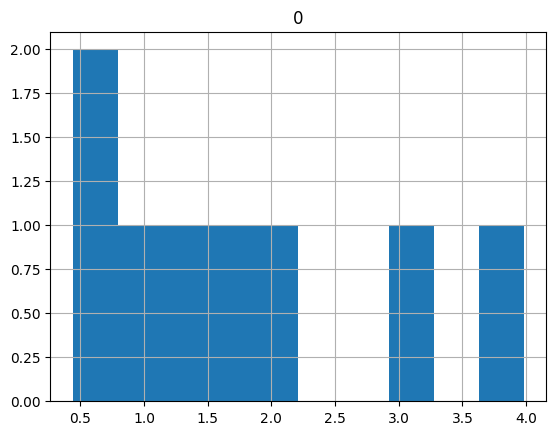

In [34]:
pd.DataFrame(predDefault).hist()

In [35]:
ExpectedLoss = sum(AdversePortfolio["EAD"]*AdversePortfolio["LGD"]*PD)

In [36]:
ExpectedLoss

23.281122080658584

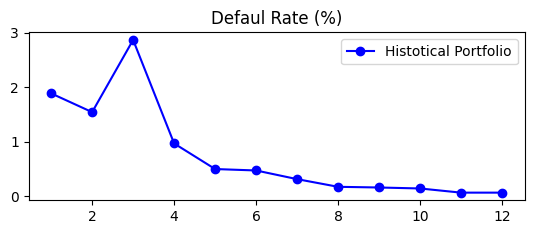

In [37]:
plt.subplot(2, 1, 1)
plt.plot(combinedHistory["YOB"].unique(), Default, "o-", color = "blue", label = "Histotical Portfolio")
plt.title("Defaul Rate (%)")
plt.legend()

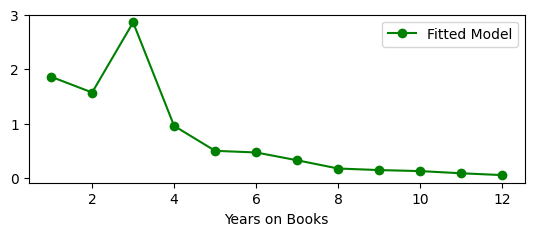

In [38]:
plt.subplot(2, 1, 2)
plt.plot(Model["YOB"].unique(), estDefault, "o-", color = "green", label = "Fitted Model")
plt.xlabel("Years on Books")
plt.legend()

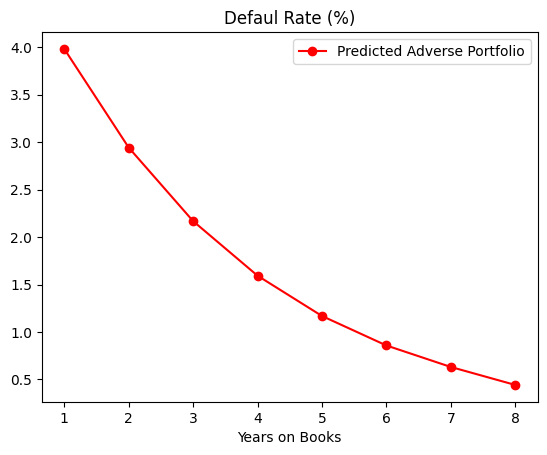

In [39]:
plt.plot(predPD["YOB"].unique(), predDefault, "o-", color = "red", label = "Predicted Adverse Portfolio")
plt.title("Defaul Rate (%)")
plt.xlabel("Years on Books")
plt.legend()
plt.show()